In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import levene

In [2]:
df = pd.read_csv('C:/Users/0&1/Downloads/AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


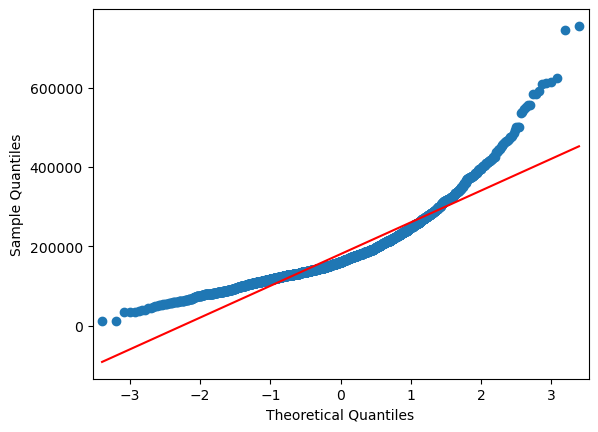

In [4]:
qqplot(df['SalePrice'],line='s')
plt.show()

In [5]:
df['SalePrice_log_t']=stats.boxcox(df['SalePrice'], 0)

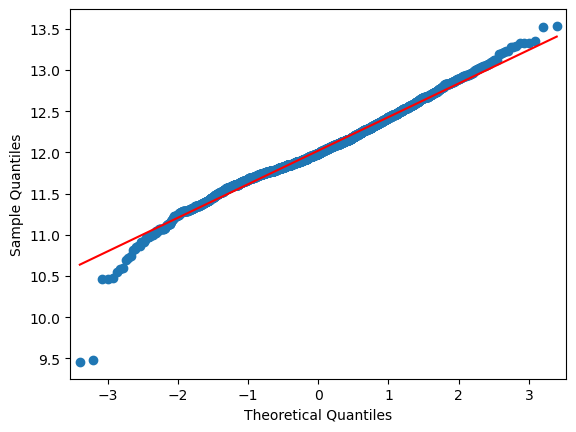

In [6]:
qqplot(df['SalePrice_log_t'],line='s')
plt.show()

In [7]:
df['SeasonOfYear']=df['Mo Sold'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                                             3:'Spring',4:'Spring',5:'Spring',
                                                             6:'Summer',7:'Summer',8:'Summer',
                                                             9: 'Fall',10:'Fall',11:'Fall'} )

In [8]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePrice_log_t,SeasonOfYear
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,12.278393,Spring
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,11.561716,Summer
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,12.055250,Summer
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,12.404924,Spring
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,12.154253,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,GdPrv,NaN,0,3,2006,WD,Normal,142500,11.867097,Spring
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,MnPrv,NaN,0,6,2006,WD,Normal,131000,11.782953,Summer
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,MnPrv,Shed,700,7,2006,WD,Normal,132000,11.790557,Summer
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2006,WD,Normal,170000,12.043554,Spring


In [9]:
df.rename(columns = {'Heating QC':'Heating_QC'},inplace=True)

In [10]:
levene(df['SalePrice_log_t'][df['Heating_QC'] == 'Fa'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'TA'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Ex'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Gd'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Po'], center='mean')

LeveneResult(statistic=22.38751959820486, pvalue=3.11887173924377e-18)

In [11]:
levene(df['SalePrice_log_t'][df['SeasonOfYear'] == 'Winter'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Spring'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Summer'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Fall'], center='mean')

LeveneResult(statistic=4.994304629795276, pvalue=0.0018622992763628477)

In [ ]:
multiple_variables=ols('SalePrice ~ C(SeasonOfYear) + C(Heating_QC) + C(SeasonOfYear): C(Heating_QC) ',data=df).fit()
sms.anova_lm(multiple_variables, typ=2)

In [12]:
heating_result = stats.kruskal(df['SalePrice_log_t'][df['Heating_QC'] == 'Fa'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'TA'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Ex'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Gd'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Po'])

In [13]:
heating_result

KruskalResult(statistic=784.2146131524007, pvalue=2.015911934803459e-168)

In [14]:
season_result = stats.kruskal(df['SalePrice_log_t'][df['SeasonOfYear'] == 'Winter'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Spring'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Summer'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Fall'])

In [15]:
season_result

KruskalResult(statistic=12.480060752866562, pvalue=0.005907204012320759)

In [16]:
import sklearn

In [17]:
!pip install scikit-posthocs

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import scikit_posthocs as sp

In [19]:
data_season =[df['SalePrice_log_t'][df['SeasonOfYear'] == 'Winter'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Spring'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Summer'],
     df['SalePrice_log_t'][df['SeasonOfYear'] == 'Fall']]

In [20]:
sp.posthoc_dunn(data_season, p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000,0.215549,1.000000,1.000000
2,0.215549,1.000000,0.011598,0.034648
3,1.000000,0.011598,1.000000,1.000000
4,1.000000,0.034648,1.000000,1.000000


In [21]:
data_heating = [df['SalePrice_log_t'][df['Heating_QC'] == 'Fa'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'TA'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Ex'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Gd'],
     df['SalePrice_log_t'][df['Heating_QC'] == 'Po']]

In [22]:
sp.posthoc_dunn(data_heating, p_adjust = 'bonferroni')

,1,2,3,4,5
1,1.000000e+00,6.376390e-01,1.106426e-32,5.435310e-05,1.000000
2,6.376390e-01,1.000000e+00,4.561944e-144,3.569205e-07,1.000000
3,1.106426e-32,4.561944e-144,1.000000e+00,7.090410e-49,0.003989
4,5.435310e-05,3.569205e-07,7.090410e-49,1.000000e+00,0.289679
5,1.000000e+00,1.000000e+00,3.989498e-03,2.896787e-01,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000002A6E20DE0C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
C:\Users\0&1\AppData\Local\Temp\ipykernel_1436\314000235.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  interaction_plot(df['Heating_QC'],df['SeasonOfYear'],df['SalePrice_log_t']).show()


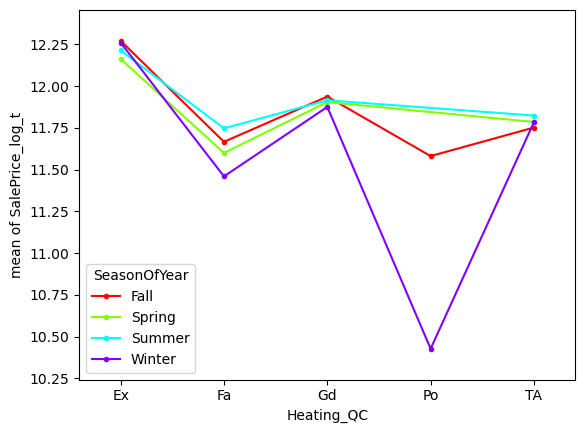

In [23]:
interaction_plot(df['Heating_QC'],df['SeasonOfYear'],df['SalePrice_log_t']).show()